# Clase 6: Clustering

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**


## Objetivos de la Clase

- Formas útiles de EDA para clustering
- Comprender cuál es la utilidad de las técnicas de clustering.
- Analizar diversos tipos de algoritmos de clustering.

## Aprendizaje supervisado vs no supervisado

Cuando se utiliza aprendizaje automático (ML) en ciencia de datos se busca aprender patrones en base a los datos. Dentro de esto se distinguen 2 tipos principales de aprendizaje: Supervisado vs No supervisado.

- **Aprendizaje supervisado** corresponde a entender los datos en función de una variable objetivo o una etiqueta, con la idea de poder predecir esta variable. Esto es, entrenar un modelo que transforme los datos en función de esta variable. Por ejemplo, entender cómo combinar u operar los datos para acercarse lo más posible a un valor objetivo numérico. Dentro de esta categoría entran la **regresión** y la **clasificación**
- **Aprendizaje no supervisado** corresponde a entender "los datos en sí", sin una variable objetivo en mente, entrenando un modelo que realice alguna transformación significativa para este conjunto de datos en particular. Por ejemplo, evaluar si existen agrupaciones naturales de los datos y entrenar un modelo que en base a los datos determine a qué grupo pertenece. Dentro de esta categoría entran la **reducción de domensionalidad** y el **clustering**


    > Otros: Autosupervisado y reforzado


## Clustering

Clustering es la tarea que consiste en agrupar observaciones similares en grupos llamados *clusters*. La idea es que los grupos solo contengan información similar.
Es una tarea usual al realizar Análisis Exploratorio de Datos (EDA), ya que permite encontrar de forma automatizada grupos de observaciones similares.

Ya que no es necesario que el dataset esté etiquetado, es una técnica de aprendizaje no-supervisado.

<div align='center'>
    <img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/clustering.png?raw=true' width=800/>
</div>

<div align='center'>
    <span>Ejemplo de Clustering. Fuente: <a href='https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html'>Comparación de Clustering en Scikit-Learn.</a></span>
</div>

## Tipos de Clustering

Existen varias técnicas de clustering, las cuales se pueden clasificar en las siguientes categorías:


|  | **Particional** | **Jerárquico** | **Difuso** |
|---|---|---|---|
| Descripción | Divide los datos en clusters sin traslape, tal que cada dato está en un solo grupo y en ningún otro. | Agrupa ejemplos al ir estableciendo jerarquías entre estos, de tal manera que los datos son organizados como un árbol. | Cada objeto pertenece a cada cluster con un peso de pertenencia entre 0 y 1. |
| Ejemplos | K-Means, DBScan | Aglomerativo, Divisivo | Mixtura de Gaussianas |

## Clustering en `Scikit-learn`

Scikit-learn ofrece una gran gama de algoritmos de clustering para explorar.





<div align='center'>
    <img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/cluster_comparison.png?raw=true' width=800/>
</div>

<div align='center'>
    <span>Ejemplo de los distintos métodos de Clustering ofrecidos por Scikit-Learn. </span>
    <br>
    Fuente: <a href='https://scikit-learn.org/stable/modules/clustering.html'>Clustering en Scikit-Learn.</a>
</div>

---

## Problema de Hoy: 🎸🤘 Caracterización Musical 🎼🎵 

<div align='center'>
<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/spotify.png?raw=true' width=200/>
</div>

 
    
Los atributos son: 

- `key`: escala de la canción. 0 = C, 1 = C♯/D♭, 2 = D...  [Mas información](https://en.wikipedia.org/wiki/Pitch_class).
- `modo`: 1 si la escala es mayor, 0 si es menor.
- `time_signature`: cuántos pulsos hay en cada compás. (4, 3,...).
- `loudness`: Volumen de la canción (rango -60, 0).


- `acousticness`: Probabilidad de que la canción sea solo acústica.
- `danceability`: Describe que tan bailable es la canción. (rango 0, 1).
- `energy`: Mide que tan energética es una canción (rango 0, 1).
- `instrumentalness`: Probabilidad que la canción contenga voces.
- `liveness`: Probabilidad de que la canción fuese grabada en vivo.
- `speechiness`: Probabilidad de que la canción sea exclusivamente vocal (ejemplo: podcast : 1). 
- `valence`: Sentimiento de la canción (rango 0, 1). 1 -> felicidad, alegria, euforia. 0 -> Tristeza, enojo, depresión.
- `tempo` : Pulsos por minuto de la canción (BPM). 
- `genre`: Género de la canción.



### Análisis Exploratorio de Datos

In [1]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("../../recursos/2023-01/17-Clustering/descriptores_musica.csv")
df.head(5)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,name,artist,genre
0,0.617,0.771,10,-5.586,0,0.1120,0.0384,0.000003,0.1620,0.553,180.002,3nCFiwtuVqVJmnSasApvr3,267747,4,Salgo Pa' la Calle,Daddy Yankee,Reggaeton
1,0.788,0.674,2,-8.392,1,0.0537,0.2810,0.033000,0.0892,0.864,94.997,5I0u5YHYvA6fQZstVCFwqC,214747,4,Dile A Tu Amiga,Ñejo,Reggaeton
2,0.745,0.744,5,-8.230,1,0.0837,0.0266,0.000018,0.0959,0.849,96.026,1FTTvjvgX2Qd9ZJqo36m1C,244663,4,Nada Va Pasar,Yaga Y Mackie,Reggaeton
3,0.782,0.767,9,-7.981,0,0.0871,0.2660,0.000036,0.0947,0.622,88.005,6DxS2ZRl8G3EagHkovYXA2,304091,4,Zun Da Da,Zion,Reggaeton
4,0.702,0.864,1,-5.496,1,0.0818,0.1080,0.000000,0.1870,0.788,94.994,4mM90OUhSN79RRKT0qv4dY,215118,4,Fuera del Planeta,Randy,Reggaeton


In [2]:
df['genre'].unique()

array(['Reggaeton', 'Rock', 'Rock latino', 'Disco', 'Clasica', 'Jazz',
       'Electronica', 'Hiphop', 'Pop'], dtype=object)

In [3]:
df['genre'].value_counts()

genre
Reggaeton      100
Rock           100
Rock latino    100
Clasica        100
Pop            100
Hiphop         100
Disco           82
Jazz            70
Electronica     62
Name: count, dtype: int64

In [4]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,8.140000e+02,814.000000
mean,0.600392,0.589244,5.491400,-10.017713,0.598280,0.090809,0.324999,0.159151,0.181294,0.532020,113.486484,2.838903e+05,3.926290
std,0.196368,0.268840,3.694922,6.429775,0.490547,0.095219,0.342813,0.304559,0.151797,0.268382,26.527836,1.284673e+05,0.356933
min,0.062300,0.002100,0.000000,-42.238000,0.000000,0.023200,0.000017,0.000000,0.031100,0.030800,59.406000,8.426700e+04,1.000000
25%,0.479250,0.417500,2.000000,-11.555500,0.000000,0.036500,0.033450,0.000000,0.090675,0.324000,94.013500,2.112300e+05,4.000000
50%,0.641500,0.663500,6.000000,-7.997500,1.000000,0.047550,0.180000,0.000405,0.122000,0.569000,110.033500,2.512800e+05,4.000000
75%,0.753000,0.799000,9.000000,-5.854750,1.000000,0.098000,0.575250,0.095600,0.226750,0.754000,126.928250,3.087402e+05,4.000000
max,0.976000,0.989000,11.000000,-1.446000,1.000000,0.817000,0.996000,0.958000,0.987000,0.981000,213.990000,1.252322e+06,5.000000


In [5]:
def get_ejemplo(idx):
    """
    Obtiene un ejemplo y lo formatea como columna.
    """
    ejemplo = (
        df.loc[
            idx,
            [
                "danceability",
                "energy",
                "speechiness",
                "acousticness",
                "instrumentalness",
                "valence",
                "name",
                "artist",
                "genre",
            ],
        ]
        .to_frame()
        .reset_index()
    )
    ejemplo.columns = ["Descriptor", "Valor"]
    return ejemplo

In [6]:
# pueden cambiar el índice de alguno de estos ejemplos para
# mostrar otra canción en la visualización
ejemplo1 = get_ejemplo(483)
ejemplo2 = get_ejemplo(166)
ejemplo3 = get_ejemplo(15)
ejemplo4 = get_ejemplo(810)

ejemplos = [ejemplo1, ejemplo2, ejemplo3, ejemplo4]

In [10]:
ejemplo4

,Descriptor,Valor
0,danceability,0.481
1,energy,0.451
2,speechiness,0.0347
3,acousticness,0.336
4,instrumentalness,0.0
5,valence,0.289
6,name,Hello
7,artist,Adele
8,genre,Pop


#### Spider/Radar Chart

In [11]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=2,
    cols=2,
    specs=[
        [{"type": "polar"}, {"type": "polar"}],
        [{"type": "polar"}, {"type": "polar"}],
    ],
    subplot_titles=[
        ejemplo1.loc[6, "Valor"], ejemplo3.loc[6, "Valor"],
        ejemplo2.loc[6, "Valor"], ejemplo4.loc[6, "Valor"],
    ],
)

for i, ejemplo in enumerate(ejemplos):
    fig.add_trace(
        go.Scatterpolar(
            r=ejemplo.loc[0:5, "Valor"],
            theta=ejemplo.loc[0:5, "Descriptor"],
            fill="toself",
            name=f"{ejemplo.loc[6, 'Valor']} - {ejemplo.loc[7, 'Valor']} ({ejemplo.loc[8, 'Valor']})",
        ),
        col=i // 2 + 1,
        row=i % 2 + 1,
    )

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    showlegend=False,
    title="ScatterPolar/Radar/Spider Chart/ Descripción de Ejemplos",
    height=700,
)

fig.show()

#### Histogramas

In [13]:
px.histogram(df, x="duration_ms")

In [14]:
px.histogram(df, x="loudness")

In [15]:
px.histogram(df, x="tempo")

In [16]:
dt_to_hists = df.loc[
    :,
    [
        "danceability",
        "energy",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "valence",
        "liveness",
        "genre",
    ],
].melt(id_vars=["genre"], var_name="variable", value_name="valor")

px.histogram(
    dt_to_hists, x="valor", color="variable", facet_col="variable", facet_col_wrap=4
).update_layout(showlegend=False)

### Correlaciones

In [18]:
corr = df.loc[
    :,
    [
        "danceability",
        "energy",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "valence",    ],
].corr()
px.imshow(corr, color_continuous_midpoint=0, color_continuous_scale="RdBu")

---

## Preparando los Datos

Para este clase usaremos los siguientes atributos:

In [19]:
df_ = df.loc[
    :,
    [
        "danceability",
        "energy",
        "speechiness",
        "acousticness",
        "instrumentalness",
        "valence",
        "liveness",
        "duration_ms",
        "loudness",
        "tempo",
        "name",
        "genre",
    ],
]

df_

,danceability,energy,speechiness,acousticness,instrumentalness,valence,liveness,duration_ms,loudness,tempo,name,genre
0,0.617,0.771,0.1120,0.0384,0.000003,0.553,0.1620,267747,-5.586,180.002,Salgo Pa' la Calle,Reggaeton
1,0.788,0.674,0.0537,0.2810,0.033000,0.864,0.0892,214747,-8.392,94.997,Dile A Tu Amiga,Reggaeton
2,0.745,0.744,0.0837,0.0266,0.000018,0.849,0.0959,244663,-8.230,96.026,Nada Va Pasar,Reggaeton
3,0.782,0.767,0.0871,0.2660,0.000036,0.622,0.0947,304091,-7.981,88.005,Zun Da Da,Reggaeton
4,0.702,0.864,0.0818,0.1080,0.000000,0.788,0.1870,215118,-5.496,94.994,Fuera del Planeta,Reggaeton
...,...,...,...,...,...,...,...,...,...,...,...,...
809,0.801,0.795,0.0504,0.0417,0.000113,0.754,0.0717,163253,-5.115,79.028,Feel It Still,Pop
810,0.481,0.451,0.0347,0.3360,0.000000,0.289,0.0872,295493,-6.095,157.966,Hello,Pop
811,0.638,0.656,0.0357,0.1880,0.000000,0.225,0.1460,262467,-5.886,104.036,Bleeding Love,Pop
812,0.630,0.698,0.0244,0.1730,0.000000,0.529,0.0789,261427,-4.510,94.023,Breakeven,Pop


In [20]:
df_.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,valence,liveness,duration_ms,loudness,tempo
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,8.140000e+02,814.000000,814.000000
mean,0.600392,0.589244,0.090809,0.324999,0.159151,0.532020,0.181294,2.838903e+05,-10.017713,113.486484
std,0.196368,0.268840,0.095219,0.342813,0.304559,0.268382,0.151797,1.284673e+05,6.429775,26.527836
min,0.062300,0.002100,0.023200,0.000017,0.000000,0.030800,0.031100,8.426700e+04,-42.238000,59.406000
25%,0.479250,0.417500,0.036500,0.033450,0.000000,0.324000,0.090675,2.112300e+05,-11.555500,94.013500
50%,0.641500,0.663500,0.047550,0.180000,0.000405,0.569000,0.122000,2.512800e+05,-7.997500,110.033500
75%,0.753000,0.799000,0.098000,0.575250,0.095600,0.754000,0.226750,3.087402e+05,-5.854750,126.928250
max,0.976000,0.989000,0.817000,0.996000,0.958000,0.981000,0.987000,1.252322e+06,-1.446000,213.990000


### `MinMaxScaler`

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

ct = ColumnTransformer(
  transformers = [
		(
			"MinMax", 
			MinMaxScaler(),
			["duration_ms", "loudness", "tempo"]
		)
	], 
  remainder="passthrough"
)


pipe = Pipeline(
	steps = [
		("Preprocesamiento", ct)
	]
)

In [29]:
df_

,danceability,energy,speechiness,acousticness,instrumentalness,valence,liveness,duration_ms,loudness,tempo,name,genre
0,0.617,0.771,0.1120,0.0384,0.000003,0.553,0.1620,267747,-5.586,180.002,Salgo Pa' la Calle,Reggaeton
1,0.788,0.674,0.0537,0.2810,0.033000,0.864,0.0892,214747,-8.392,94.997,Dile A Tu Amiga,Reggaeton
2,0.745,0.744,0.0837,0.0266,0.000018,0.849,0.0959,244663,-8.230,96.026,Nada Va Pasar,Reggaeton
3,0.782,0.767,0.0871,0.2660,0.000036,0.622,0.0947,304091,-7.981,88.005,Zun Da Da,Reggaeton
4,0.702,0.864,0.0818,0.1080,0.000000,0.788,0.1870,215118,-5.496,94.994,Fuera del Planeta,Reggaeton
...,...,...,...,...,...,...,...,...,...,...,...,...
809,0.801,0.795,0.0504,0.0417,0.000113,0.754,0.0717,163253,-5.115,79.028,Feel It Still,Pop
810,0.481,0.451,0.0347,0.3360,0.000000,0.289,0.0872,295493,-6.095,157.966,Hello,Pop
811,0.638,0.656,0.0357,0.1880,0.000000,0.225,0.1460,262467,-5.886,104.036,Bleeding Love,Pop
812,0.630,0.698,0.0244,0.1730,0.000000,0.529,0.0789,261427,-4.510,94.023,Breakeven,Pop


In [30]:
features_to_scale = df_.iloc[:, :-2]  # eliminar nombre y género

In [31]:
pipe.fit_transform(features_to_scale)

array([[1.57081644e-01, 8.98509512e-01, 7.80132485e-01, ...,
        3.32000000e-06, 5.53000000e-01, 1.62000000e-01],
       [1.11707069e-01, 8.29721514e-01, 2.30237282e-01, ...,
        3.30000000e-02, 8.64000000e-01, 8.92000000e-02],
       [1.37318876e-01, 8.33692881e-01, 2.36893857e-01, ...,
        1.84000000e-05, 8.49000000e-01, 9.59000000e-02],
       ...,
       [1.52561309e-01, 8.91155128e-01, 2.88710345e-01, ...,
        0.00000000e+00, 2.25000000e-01, 1.46000000e-01],
       [1.51670940e-01, 9.24887233e-01, 2.23936501e-01, ...,
        0.00000000e+00, 5.29000000e-01, 7.89000000e-02],
       [1.02517433e-01, 9.13193763e-01, 7.53752005e-01, ...,
        0.00000000e+00, 3.30000000e-01, 1.55000000e-01]], shape=(814, 10))

In [32]:
# transformamos el resultado de la transformación a un dataframe:
scaled_features = pd.DataFrame(
  pipe.fit_transform(features_to_scale), 
  columns=features_to_scale.columns
)

scaled_features

,danceability,energy,speechiness,acousticness,instrumentalness,valence,liveness,duration_ms,loudness,tempo
0,0.157082,0.898510,0.780132,0.617,0.771,0.1120,0.0384,0.000003,0.553,0.1620
1,0.111707,0.829722,0.230237,0.788,0.674,0.0537,0.2810,0.033000,0.864,0.0892
2,0.137319,0.833693,0.236894,0.745,0.744,0.0837,0.0266,0.000018,0.849,0.0959
3,0.188197,0.839797,0.185006,0.782,0.767,0.0871,0.2660,0.000036,0.622,0.0947
4,0.112025,0.900716,0.230218,0.702,0.864,0.0818,0.1080,0.000000,0.788,0.1870
...,...,...,...,...,...,...,...,...,...,...
809,0.067622,0.910056,0.126934,0.801,0.795,0.0504,0.0417,0.000113,0.754,0.0717
810,0.180836,0.886032,0.637582,0.481,0.451,0.0347,0.3360,0.000000,0.289,0.0872
811,0.152561,0.891155,0.288710,0.638,0.656,0.0357,0.1880,0.000000,0.225,0.1460
812,0.151671,0.924887,0.223937,0.630,0.698,0.0244,0.1730,0.000000,0.529,0.0789


In [33]:
scaled_features.describe()

,danceability,energy,speechiness,acousticness,instrumentalness,valence,liveness,duration_ms,loudness,tempo
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000
mean,0.170902,0.789868,0.349845,0.600392,0.589244,0.090809,0.324999,0.159151,0.532020,0.181294
std,0.109984,0.157623,0.171608,0.196368,0.268840,0.095219,0.342813,0.304559,0.268382,0.151797
min,0.000000,0.000000,0.000000,0.062300,0.002100,0.023200,0.000017,0.000000,0.030800,0.031100
25%,0.108696,0.752170,0.223875,0.479250,0.417500,0.036500,0.033450,0.000000,0.324000,0.090675
50%,0.142984,0.839393,0.327508,0.641500,0.663500,0.047550,0.180000,0.000405,0.569000,0.122000
75%,0.192177,0.891921,0.436800,0.753000,0.799000,0.098000,0.575250,0.095600,0.754000,0.226750
max,1.000000,1.000000,1.000000,0.976000,0.989000,0.817000,0.996000,0.958000,0.981000,0.987000


---

## `UMAP` - Proyectamos con UMAP

In [ ]:
from umap import UMAP

proyector = UMAP(
    random_state=88,
    n_neighbors=20,
    min_dist=0.15,
    n_components=2
)

projections = proyector.fit_transform(scaled_features)

c:\Users\Diego\.conda\envs\mds7207\Lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

c:\Users\Diego\.conda\envs\mds7207\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [35]:
projections.shape

(814, 2)

In [36]:
# este dataframe lo estaremos usando para graficar de aquí en adelante
fig_df = pd.concat(
    [
        df.loc[:, ["name", "artist", "genre"]],
        scaled_features,
        pd.DataFrame(projections, columns=["x", "y"]),
    ],
    axis=1,
)

fig_df

,name,artist,genre,danceability,energy,speechiness,acousticness,instrumentalness,valence,liveness,duration_ms,loudness,tempo,x,y
0,Salgo Pa' la Calle,Daddy Yankee,Reggaeton,0.157082,0.898510,0.780132,0.617,0.771,0.1120,0.0384,0.000003,0.553,0.1620,-4.282135,2.793703
1,Dile A Tu Amiga,Ñejo,Reggaeton,0.111707,0.829722,0.230237,0.788,0.674,0.0537,0.2810,0.033000,0.864,0.0892,-5.833894,-1.512932
2,Nada Va Pasar,Yaga Y Mackie,Reggaeton,0.137319,0.833693,0.236894,0.745,0.744,0.0837,0.0266,0.000018,0.849,0.0959,-5.462597,0.866623
3,Zun Da Da,Zion,Reggaeton,0.188197,0.839797,0.185006,0.782,0.767,0.0871,0.2660,0.000036,0.622,0.0947,-5.564950,-1.219324
4,Fuera del Planeta,Randy,Reggaeton,0.112025,0.900716,0.230218,0.702,0.864,0.0818,0.1080,0.000000,0.788,0.1870,-5.350315,-0.270591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,Feel It Still,Portugal. The Man,Pop,0.067622,0.910056,0.126934,0.801,0.795,0.0504,0.0417,0.000113,0.754,0.0717,-5.392610,-0.461773
810,Hello,Adele,Pop,0.180836,0.886032,0.637582,0.481,0.451,0.0347,0.3360,0.000000,0.289,0.0872,-1.622753,2.953674
811,Bleeding Love,Leona Lewis,Pop,0.152561,0.891155,0.288710,0.638,0.656,0.0357,0.1880,0.000000,0.225,0.1460,-0.819312,2.069303
812,Breakeven,The Script,Pop,0.151671,0.924887,0.223937,0.630,0.698,0.0244,0.1730,0.000000,0.529,0.0789,-1.299962,1.158577


In [37]:
def get_scatter(fig_df, color_col):
    fig = px.scatter(
        fig_df,
        x="x",
        y="y",
        color=color_col,
        hover_name=df["artist"] + " - " + df["name"],
        # labels={"genre": "Género Musical"},
        hover_data=[
            "danceability",
            "energy",
            "speechiness",
            "acousticness",
            "instrumentalness",
            "valence",
            'duration_ms',
            'loudness',
            'tempo',
            'genre'
        ],
        range_x=(fig_df["x"].min() - 1, fig_df["x"].max() + 1),
        range_y=(fig_df["y"].min() - 1, fig_df["y"].max() + 1),
    )
    return fig


get_scatter(fig_df, "genre")

---

**Aquí empezamos clustering**

### K-Means

Técnica de clustering de tipo particional.

Encuentra centros de clusters que minimizan la suma de distancias entre los datos y el centro de cada cluster.

Algoritmo:

---


    Seleccionar K centroides iniciales.
    repite: 
        Asigna todos los puntos a sus centros más cercanos.
        Recomputa los centros de cada cluster.
    hasta que los centros no cambien.

---
*Hasta que los centros no cambian* equivale a minimizar la suma de errores cuadrados SSE:

$$SSE = \sum_{i=1}^{K} \sum_{x\in C_i} d(c_i, x)^2 $$

Comunmente la función de distancia $d$ es la distancia euclideana $d(x,y) = \sqrt{\sum_{i}(x_i, y_i)^2}$ .

<div align='center'>

<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/kmeans_example.png?raw=true' width=500/>
</div>


> **Pregunta**: ¿Qué sucede si se eligen mal los centroides iniciales?

In [38]:
# Random State permite controlar la aleatoridad.
# Es decir, permite generar los mismos números aleatorios en distintas ejecuciones.
RANDOM_STATE = 99

In [40]:
from sklearn.cluster import KMeans

# El número de clusters es parámetro. En este caso, es 2.
kmeans = (
 KMeans(
    n_clusters=2, 
    random_state=RANDOM_STATE,
    n_init=10,
 )
 .fit(scaled_features)
)

labels = kmeans.labels_

Podemos acceder a los centroides calculados.

In [41]:
# Clusters calculados por cada observación de entrenamiento
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [42]:
# Centroides calculados.
kmeans.cluster_centers_

array([[0.24845794, 0.55109939, 0.30859586, 0.34424405, 0.15778518,
        0.0422494 , 0.89327381, 0.56745668, 0.20209881, 0.1380375 ],
       [0.15073307, 0.85196238, 0.36057269, 0.66700619, 0.70145046,
        0.103437  , 0.17721246, 0.05296682, 0.6178195 , 0.19254319]])

In [44]:
# También podemos acceder a la suma de errores cuadráticos (llamada inercia en scikit)
kmeans.inertia_

205.11423879563816

In [32]:
# Cuantas features utilizó
kmeans.n_features_in_

10

Graficamos

In [45]:
fig_df["kmeans_labels_2"] = kmeans.labels_
fig = get_scatter(fig_df, "kmeans_labels_2")

# Transformamos los centro que vimos anteriormentes a la proyección 2d.
projected_centers = proyector.transform(kmeans.cluster_centers_)

fig.add_trace(
    go.Scatter(
        x=projected_centers[:, 0],
        y=projected_centers[:, 1],
        mode="markers",
        # name="Centros",
        marker_size=12,
        marker_color="LightSlateGray",
        showlegend=False,
    )
)

In [46]:
kmeans = (
    KMeans(
        n_clusters=5,
        random_state=RANDOM_STATE, 
        n_init='auto'
		).fit(scaled_features)
)
labels = kmeans.labels_


fig_df["kmeans_labels_5"] = kmeans.labels_
fig = get_scatter(fig_df, "kmeans_labels_5")

In [47]:
# Transformamos los centros que vimos anteriormentes a la proyección 2d.
centros_pryectados = proyector.transform(kmeans.cluster_centers_)

fig = get_scatter(fig_df, "kmeans_labels_5")
fig.add_trace(
    go.Scatter(
        x=centros_pryectados[:, 0],
        y=centros_pryectados[:, 1],
        mode="markers",
        name="Centros",
        marker_size=12,
        marker_color="red",
        showlegend=False,
    )
)

> **Pregunta:** ¿Cómo identificamos la cantidad de cluster óptimos?


### Método del Codo



![Método del Codo](https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/elbow.png?raw=true)

In [48]:
intertias = [
    [i, KMeans(n_clusters=i, random_state=0, n_init='auto').fit(scaled_features).inertia_]
    for i in range(2, 20)
]

intertias = pd.DataFrame(intertias, columns=["n° clusters", "inertia"])
intertias.head(10)

,n° clusters,inertia
0,2,205.114239
1,3,167.625497
2,4,146.150456
3,5,137.270007
4,6,129.058291
5,7,121.350645
6,8,117.185870
7,9,112.762620
8,10,109.318779
9,11,98.062250


In [49]:
px.line(
    intertias,
    x="n° clusters",
    y="inertia",
    title="Método del Codo con K-Means",
    height=600,
)

**Alternativa: Coeficiente de Silohuette**


El valor de la silueta es una medida de cuán similar es un objeto respecto a su propio cluster en comparación con los otros.  


Por cada elemento se calcula: 

$$s = \frac{b-a}{\max(a,b)}$$

donde: 

- $a$ es el promedio de las distancias entre el elemento y todos los otros elementos del cluster al cual el elemento analizado fue etiquetado.
- $b$ es la distancia promedio entre el elemento y todos los otros elementos del cluster más cercano.

La silueta va de -1 a +1 donde 
- un valor cercano a 1: indica que el objeto está bien clusterizado
- cercano a 0: indica que el elemento está entre dos clusters
- cercano a $-1$: indica que el elemento está mal asignado. 

Si la mayoría de los objetos tienen un valor alto, entonces podemos decir que los elementos del cluster están bien asignados.

Por último, el coeficiente de silueta se calcula al promediar todos los coeficientes individuales.

In [50]:
from sklearn.metrics import silhouette_score

scores = [
    [
        i,
        silhouette_score(
            scaled_features,
            KMeans(n_clusters=i, random_state=RANDOM_STATE, n_init='auto').fit(scaled_features).labels_,
        ),
    ]
    for i in range(2, 20)
]

scores = pd.DataFrame(scores, columns=["n° clusters", "silhouette_score"])
scores.head(10)

,n° clusters,silhouette_score
0,2,0.501798
1,3,0.342116
2,4,0.240110
3,5,0.247836
4,6,0.181462
5,7,0.194743
6,8,0.182374
7,9,0.191077
8,10,0.188984
9,11,0.169145


In [39]:
px.line(scores, x="n° clusters", y="silhouette_score")

**Más opciones:**

https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c

> **Pregunta ❓**: ¿Podría usar k-means con datos categóricos?

En general, los algoritmos de clustering tradicionales están diseñados para trabajar con datos numéricos y utilizan medidas de distancia, como la euclidiana, para determinar la similitud entre los puntos de datos. Sin embargo, aplicar estas técnicas directamente a datos categóricos puede ser inapropiado, ya que la distancia euclidiana pierde su significado cuando se trata de atributos que no son numéricos. Esto puede llevar a interpretaciones erróneas y resultados de clustering no fiables. Es crucial seleccionar algoritmos, como k-modes, que estén específicamente adaptados para manejar datos categóricos y que utilicen métricas de disimilitud adecuadas para este tipo de información.

<div align='center'>
<img src=../../recursos/2025-01/6-Clustering/distancia_euclidiana.png width=400 />
</div>

Una forma de solucionar este problema es utilizando [kmodes](https://pypi.org/project/kmodes). Esto se da, gracias a que el algoritmo de k-modes maneja eficientemente los datos categóricos mediante el uso de una medida de disimilitud de coincidencia simple, la que evalúa cuán diferentes son los puntos de datos basándose en las categorías que no comparten. A diferencia del algoritmo k-means, que calcula los centros de los clústeres promediando, k-modes determina los centros de los clústeres usando modas, es decir, las categorías más frecuentes en el clúster. Durante el proceso de agrupamiento, k-modes emplea un método basado en la frecuencia para actualizar estas modas. Este enfoque tiene como objetivo minimizar la función de costo de agrupamiento, mejorando la efectividad y precisión general del agrupamiento.

<div align='center'>
<img src=../../recursos/2025-01/6-Clustering/kmode.png width=600 /> 
</div> 

---


## `DBSCAN`
	

Algoritmo de clustering basado en densidad. Ideal para buscar outliers.

- Densidad: Número de puntos en un círculo.
- Idea: Regiones densas representan clusters.

Parámetros: 

- `Eps`: radio de los círculos
- `MinPts`: número mínimo de puntos de una región.


- Es comunmente resistente al ruido.
- Problemas en regiones con distintas densidades.

Tipos de puntos:
- **Punto núcleo**: tiene al menos `min_samples` dentro de su `eps`. Es considerado un punto denso.
- **Punto frontera**: tiene menos de `min_samples` dentro de su vecindario, pero está cerca de un núcleo. Está conectado, pero no forma parte del núcleo.
- **Punto ruido**: no es núcleo ni frontera, por lo tanto se considera un punto aislado (outlier).


<div align='center'>
<img src=../../recursos/2025-01/6-Clustering/dbscan.png width=500 />
</div> 

In [57]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=3)
dbscan.fit(scaled_features)

fig_df["dbscan"] = pd.Series(dbscan.labels_, dtype=str)

get_scatter(fig_df, "dbscan")

### Visualizando el parámetro eps

In [53]:
import numpy as np

epss = np.arange(0.1, 1, 0.2)
epss

array([0.1, 0.3, 0.5, 0.7, 0.9])

In [54]:
clustering = [
    DBSCAN(eps=eps, min_samples=2).fit_predict(scaled_features) for eps in epss
]

dbscan_labels = pd.DataFrame(np.array(clustering)).T
dbscan_labels.columns = np.round(epss, 3)

dbscan_labels["x"] = projections[:, 0]
dbscan_labels["y"] = projections[:, 1]

dbscan_labels = dbscan_labels.melt(
    id_vars=["x", "y"], var_name="eps", value_name="label"
)
dbscan_labels["label"] = dbscan_labels["label"].astype(str)
dbscan_labels.sample(10)

,x,y,eps,label
3343,-4.959314,2.945472,0.9,0
3258,-5.462597,0.866623,0.9,0
1401,-0.554454,2.145915,0.3,0
1068,-0.951336,-1.924552,0.3,0
2510,-5.017636,-0.471159,0.7,0
644,-6.241054,-1.019678,0.1,-1
328,-3.950364,0.149364,0.1,-1
3408,-6.081575,0.935933,0.9,0
3755,8.264515,-1.814738,0.9,0
2280,-1.921723,0.562006,0.5,0


In [55]:

fig = px.scatter(
    dbscan_labels,
    x="x",
    y="y",
    facet_row="eps",
    color="label",
    height=1600,
)
fig.show()

In [44]:
dbscan_labels.loc[dbscan_labels['eps'] == 0.3, 'label'].value_counts()

label
0     610
-1     85
8      84
5       3
2       2
1       2
4       2
3       2
6       2
7       2
9       2
10      2
11      2
12      2
13      2
14      2
15      2
16      2
17      2
18      2
Name: count, dtype: int64

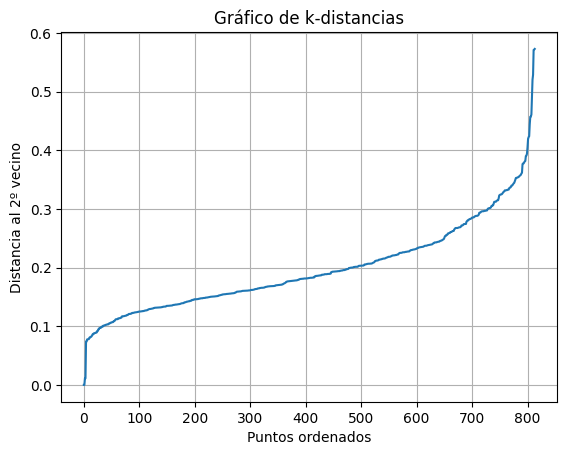

In [58]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

neighbors = NearestNeighbors(n_neighbors=2).fit(scaled_features)
distances, indices = neighbors.kneighbors(scaled_features)
distances = np.sort(distances[:, 1])
plt.plot(distances)
plt.title("Gráfico de k-distancias")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al 2º vecino")
plt.grid(True)
plt.show()

---

## Clustering Jerárquico
</br>
<div align='center'>
<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/clustering_jerarquico.png?raw=true' width=400 />
</div>

> **Pregunta**: ¿Cómo los agrupamos?

Requieren que exista una **definición de distancia** entre los elementos que se desean agrupar.

<div align='center'>
<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/matriz_distancias.png?raw=true' width=800 />
</div>


### Tipos

#### Aglomerativo

- Empezar con cada punto como cluster individual.
- En cada paso, mezclar el par de clusters más cercano hasta que quede sólo un cluster (o k clusters).

#### Divisivo

- Empezar con un cluster que contenga todos los puntos
- En cada paso, dividir un cluster en dos hasta que todo cluster contenga un solo punto (o haya k clusters).




### Algortimo básico Aglomerativo


---

    Partimos con que cada punto es cluster por separado.
    Calculamos la matriz de distancias.
    Repetimos :
      Unimos los puntos/clusters (usando la matriz de distancias) en un solo cluster según algún criterio/enlace.
	  Se recalcula la matriz de distancia.
    hasta que ya no podamos unir nada más.
---


### Tipos de Enlaces entre Clusters


El enlace determina como se irán uniendo los distintos clusters que se irán generando. Existen varias opciones: 

- **Máx - Enlace Completo** (`complete`): Va uniendo puntos/clusters más lejanos.


- **Min - Enlace Simple** (`simple`): Va uniendo puntos/clusters más cercanos.


- **Promedio entre grupos** (`average`): Va uniendo según el promedio de la distancia de todos contra todos


- **Ward (`ward`)**: Va uniendo al minimizar la suma de las diferencias cuadradas entre cluster. Muy similar a lo que hace K-Means.


La opción elegida puede provocar variaciones gigantezcas entre los clusters producidos.

In [61]:
import numpy as np
import plotly.figure_factory as ff
from scipy.cluster.hierarchy import average, complete, single, ward
from sklearn.cluster import AgglomerativeClustering

#### Máx - Enlace Completo (`complete`)
    
<div align='center'>
<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/agglomerative_max.png?raw=true' width=400 />
</div>
    
$$\max\{(d(x,y): x \in A, y \in B)\}$$  
    
    
- Solo se agrupan dos clusters si todos sus puntos están suficientemente cerca entre sí.
- Produce clusters esféricos, bien separados, y menos sensibles a outliers.

In [62]:
sample = scaled_features.sample(20, random_state=RANDOM_STATE)
sample

,danceability,energy,speechiness,acousticness,instrumentalness,valence,liveness,duration_ms,loudness,tempo
477,0.096856,0.278363,0.150339,0.161,0.0144,0.0365,0.98600,0.117000,0.0336,0.0836
470,0.102586,0.556800,0.191779,0.253,0.1770,0.0346,0.89400,0.573000,0.2420,0.6680
219,0.187400,0.825652,0.425245,0.401,0.6720,0.0468,0.02050,0.000043,0.5490,0.1520
115,0.244280,0.867866,0.231945,0.483,0.7210,0.0320,0.72900,0.000000,0.5620,0.1890
427,0.389137,0.690650,0.305866,0.398,0.3730,0.0524,0.88900,0.193000,0.6100,0.1210
22,0.111170,0.896107,0.327343,0.897,0.7550,0.1440,0.00758,0.000451,0.5670,0.2640
411,0.070967,0.633556,0.090934,0.223,0.1650,0.0504,0.98400,0.950000,0.0518,0.3480
368,0.205333,0.776059,0.426726,0.794,0.5050,0.0331,0.11100,0.005550,0.8940,0.1670
329,0.253230,0.686532,0.443739,0.740,0.6620,0.0505,0.03240,0.092000,0.9300,0.0603
659,0.122026,0.823519,0.207758,0.858,0.7670,0.3020,0.00666,0.000000,0.7530,0.0489


In [63]:
# plot the top three levels of the dendrogram
ff.create_dendrogram(
    sample,
    labels=(
        df.loc[sample.index, "artist"] + " - " + df.loc[sample.index, "name"]
    ).values,
    linkagefun=complete,
    orientation="left",
    color_threshold=1.5,
).update_layout(width=1000, height=800)

In [64]:
model = AgglomerativeClustering(n_clusters=5, linkage="complete")
labels = model.fit_predict(scaled_features)

fig_df["ag_complete"] = pd.Series(model.labels_, dtype=str)

get_scatter(fig_df, "ag_complete")

In [96]:
pd.Series(model.labels_, dtype=str).value_counts()

0    554
2    109
3     88
1     32
4     31
Name: count, dtype: int64

#### Mín - Enlace Simple (`single`)

<div align='center'>
<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/agglomerative_min.png?raw=true' width=400 />
</div>

$$\min\{(d(x,y): x \in A, y \in B)\}$$  


- Agrupa puntos uno por uno a lo largo del camino más corto.
- Resulta en clusters muy alargados.
- Es muy sensible al ruido o a “puentes” de puntos intermedios.



In [65]:
# plot the top three levels of the dendrogram
ff.create_dendrogram(
    sample,
    labels=(
        df.loc[sample.index, "artist"] + " - " + df.loc[sample.index, "name"]
    ).values,
    linkagefun=single,
    orientation="left",
    color_threshold=0.4,
).update_layout(width=1000, height=800)

In [66]:
model = AgglomerativeClustering(n_clusters=5, linkage="single")
labels = model.fit_predict(scaled_features)


fig_df["ag_single"] = pd.Series(model.labels_, dtype=str)
get_scatter(fig_df, "ag_single")

In [ ]:
pd.Series(model.labels_, dtype=str).value_counts()

#### Promedio (`average`)

<div align='center'>
<img src='https://github.com/MDS7202/MDS7202/blob/main/recursos/2023-01/17-Clustering/agglomerative_mean.png?raw=true' width=400 />
</div>


- Usa la distancia promedio entre todos los puntos de dos clusters.
- No es tan estricto como complete ni tan flexible como single.
- Produce resultados más balanceados, pero puede ser más lento.

In [67]:
# plot the top three levels of the dendrogram
ff.create_dendrogram(
    sample,
    labels=(
        df.loc[sample.index, "artist"] + " - " + df.loc[sample.index, "name"]
    ).values,
    linkagefun=average,
    orientation="left",
    color_threshold=0.8,
).update_layout(width=1000, height=800)

In [68]:
model = AgglomerativeClustering(n_clusters=5, linkage="average")
labels = model.fit_predict(scaled_features)

fig_df["ag_average"] = pd.Series(model.labels_, dtype=str)
get_scatter(fig_df, "ag_average")

In [101]:
pd.Series(model.labels_, dtype=str).value_counts()

0    622
1    113
3     77
4      1
2      1
Name: count, dtype: int64

#### Ward (`ward`)

$$Distancia(Ci,Cj)=SSE(Ci∪Cj)−SSE(Ci)−SSE(Cj)$$
    

Busca minimizar el incremento del SSE cuando se mezclan dos clusters


In [69]:
# plot the top three levels of the dendrogram
ff.create_dendrogram(
    sample,
    labels=(
        df.loc[sample.index, "artist"] + " - " + df.loc[sample.index, "name"]
    ).values,
    linkagefun=ward,
    orientation="left",
    color_threshold=0.8,
).update_layout(width=1000, height=800)

In [70]:
model = AgglomerativeClustering(n_clusters=5, linkage="ward")
labels = model.fit_predict(scaled_features)

fig_df["ag_ward"] = pd.Series(model.labels_, dtype=str)
get_scatter(fig_df, "ag_ward")

In [ ]:
pd.Series(model.labels_, dtype=str).value_counts()

### Resumen clustering jerárquicos

Ventajas: 
    
- No hay que suponer a priori el número de clases.
- Podemos escoger el número de clusters cortando el dendograma. 


Desventajas:

- No hay función objetivo por minimizar.
- Diferentes esquemas presentan diferentes problemas.

## Gaussian Mixture

<center>
<img src="../2024-01/imagenes_clase_12/gaussian-mixture-models-1.png" width=300 />
<center>
<img src="../2024-01/imagenes_clase_12/kmeans_vs_gmm_2.png" width=300 />

Un Modelo de Mezclas Gaussianas (GMM) es un modelo probabilístico que asume que todos los datos generados provienen de una combinación de varias distribuciones gaussianas (normales) con parámetros desconocidos. Es utilizado ampliamente en tareas de clustering debido a su capacidad para modelar clústeres que tienen formas elipsoidales y diferentes tamaños. 

> En esencia, un GMM intenta estimar las medias y las covarianzas de las distribuciones gaussianas que mejor describen los datos, y asigna probabilidades de pertenencia a cada clúster para cada punto del dataset.

Entonces un GMM modela la función de densidad conjunta como una suma ponderada de $K$ gaussianas multivariadas:

$$p(x)= \sum_{k=1}^K \pi_k \cdot \mathcal{N}(x \mid \mu_k, \Sigma_k)$$

Cada componente en el GMM tiene tres parámetros principales:

- Media (μ): El centro del clúster.
- Covarianza (Σ): Define la forma y orientación del clúster.
- Peso (π): el peso de un cluster.

Algoritmo Expectation-Maximization (EM)

Para ajustar un GMM a los datos, se utiliza el algoritmo Expectation-Maximization (EM), que es un enfoque iterativo para encontrar estimadores de máxima verosimilitud de parámetros en modelos estadísticos dependientes de variables latentes. El EM alterna entre dos pasos:

- Expectation (E): Calcula la probabilidad de que cada observación pertenezca a cada clúster, basado en los parámetros actuales de las distribuciones gaussianas.
- Maximization (M): Actualiza los parámetros de las distribuciones (medias, covarianzas, pesos) para maximizar la verosimilitud de los datos dados las probabilidades calculadas en el paso E.

### Funcionamiento resumido

<center>
<img src="../../recursos/2025-01/imagenes_clase_6/gmm_gif.gif" width=300 />

1. **Inicializar Parámetros**: Inicializa las medias $\mu_k$, las matrices de covarianza $\Sigma_k$ y los coeficientes de mezcla $\pi_k$ con valores aleatorios o predefinidos.
2. **Calcular probabilidad de pertenencia a cada cluster**: Calcula la probabilidad de que una observación provenga de un cluster $k$.
3. **Reestimar Parámetros**: Actualiza todos los parámetros utilizando las asignaciones encontradas en el paso 2.
4. **Calcular la Log-verosimilitud**: Calcula la log-verosimilitud de los datos dados el modelo.
5. **Verificar Convergencia**: Define un criterio de convergencia. Si el valor de la log-verosimilitud se estabiliza (o si todos los parámetros convergen), detén el proceso. De lo contrario, regresa al Paso 2.

In [80]:
from sklearn.mixture import GaussianMixture 

gmm = GaussianMixture(n_components = 3, random_state=32) 
gmm.fit(scaled_features)

,n_components,3
,covariance_type,'full'
,tol,0.001
,reg_covar,1e-06
,max_iter,100
,n_init,1
,init_params,'kmeans'
,weights_init,None
,means_init,None
,precisions_init,None
,random_state,32


In [81]:
# Para obtener las labels
gmm.predict(scaled_features)

array([2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 0,
       2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 1, 1, 0, 2, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 2,
       2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,

In [82]:
# Para obtener las probabilidaes
gmm.predict_proba(scaled_features)

array([[1.43959153e-003, 2.50498696e-021, 9.98560408e-001],
       [9.88216664e-001, 1.17833358e-002, 1.33046934e-134],
       [2.65280712e-003, 8.12921263e-013, 9.97347193e-001],
       ...,
       [2.40002229e-004, 1.09095053e-007, 9.99759889e-001],
       [1.74891766e-004, 2.15136342e-007, 9.99824893e-001],
       [1.83259790e-003, 1.76035030e-029, 9.98167402e-001]],
      shape=(814, 3))

In [83]:
#caso particular
gmm.predict_proba(scaled_features)[0]

array([1.43959153e-03, 2.50498696e-21, 9.98560408e-01])

In [84]:
# Obtener los centroides de las distribuciones
gmm.means_

array([[1.75941447e-01, 8.46711237e-01, 3.98308345e-01, 6.62695363e-01,
        7.44991372e-01, 7.63982222e-02, 7.12709956e-02, 1.94276607e-01,
        6.35397746e-01, 1.82644552e-01],
       [2.62241455e-01, 5.59836090e-01, 3.07171315e-01, 3.59985549e-01,
        1.97080227e-01, 4.27228019e-02, 8.56741741e-01, 5.55529221e-01,
        2.50842928e-01, 1.38146809e-01],
       [1.35341523e-01, 8.55873853e-01, 3.49247327e-01, 6.68393862e-01,
        6.81844196e-01, 1.13512045e-01, 2.13852393e-01, 3.40478958e-04,
        6.01220619e-01, 1.96828442e-01]])

In [85]:
# número de cluster
gmm.n_components

3

In [86]:
# pesos
print(gmm.weights_)

[0.19814898 0.21683209 0.58501893]


In [87]:
gmm.weights_.sum()

np.float64(1.0)

In [88]:
fig_df["gmm_labels"] = gmm.predict(scaled_features)
fig_gmm = get_scatter(fig_df, "gmm_labels")

# Transformamos los centro que vimos anteriormentes a la proyección 2d.
projected_centers_gmm = proyector.transform(gmm.means_)

fig_gmm.add_trace(
    go.Scatter(
        x=projected_centers_gmm[:, 0],
        y=projected_centers_gmm[:, 1],
        mode="markers",
        marker_size=12,
        marker_color="LightSlateGray",
    )
)

### En síntesis GMM vs KMeans

<center>
<img src="../2024-01/imagenes_clase_12/procons.gif" width=300 />

**Pros**

<center>
<img src="../2024-01/imagenes_clase_12/gmm_final.png" width=300 />

1. **Formas de los clústeres**: K-means asume que los clústeres son esféricos y tienden a tener un tamaño similar en términos de número de puntos de datos. Por lo tanto, funciona mejor cuando esta suposición se mantiene. En cambio, GMM es más flexible ya que puede acomodar clústeres que tienen formas elipsoidales y diferentes tamaños. Esto es posible porque GMM modela cada clúster usando una distribución gaussiana.

2. **Asignación suave**: K-means asigna cada punto de datos a un solo clúster (asignación dura), lo que puede ser limitante cuando un punto se sitúa cerca del límite entre dos clústeres. GMM, por otro lado, asigna probabilidades a cada punto de datos para pertenecer a múltiples clústeres (asignación suave). Esto proporciona una imagen más matizada de la estructura de los datos.

3. **Robustez en la distribución de los datos**: GMM puede ser más efectivo que K-means en situaciones donde los datos no están uniformemente distribuidos entre los clústeres o cuando hay una mezcla compleja en la distribución de los datos.

**Contras**

1. Sensibilidad a los valores iniciales: Los resultados del EM pueden variar significativamente dependiendo de los valores iniciales.
2. Optimización local: GMM puede quedar atrapado en óptimos locales, especialmente si el espacio de datos es complejo o si hay muchos parámetros a estimar.
3. Escalabilidad: GMM puede ser computacionalmente costoso con un gran número de componentes o un gran volumen de datos.

In [90]:
"hola" + 3

TypeError: can only concatenate str (not "int") to str